In [22]:
import pandas as pd
import numpy as np

train_path = "./data/train.csv"
test_path = "./data/val.csv"

In [23]:
# read data
train_raw_data = pd.read_csv(train_path, sep=";")
test_raw_data = pd.read_csv(test_path, sep=";")
raw_data = pd.concat([train_raw_data, test_raw_data])
n_train = len(train_raw_data)
n_test = len(test_raw_data)

In [24]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 99
Data columns (total 21 columns):
ID                                 640 non-null int64
Reason for absence                 640 non-null int64
Month of absence                   640 non-null int64
Day of the week                    640 non-null int64
Seasons                            640 non-null int64
Transportation expense             640 non-null int64
Distance from Residence to Work    640 non-null int64
Service time                       640 non-null int64
Age                                640 non-null int64
Work load Average/day              640 non-null float64
Hit target                         640 non-null int64
Disciplinary failure               640 non-null int64
Education                          640 non-null int64
Son                                640 non-null int64
Social drinker                     640 non-null int64
Social smoker                      640 non-null int64
Pet                           

In [25]:
raw_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,640.000000,640.000000,640.000000,640.000000,640.00000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.764063,19.440625,6.562500,3.893750,2.54375,223.457812,30.401563,12.667188,36.382812,275.071378,...,0.056250,1.242188,1.028125,0.585938,0.068750,0.692187,79.231250,171.882812,26.810938,6.631250
std,11.052682,8.419158,3.591744,1.427856,1.15387,65.853787,14.870952,4.331005,6.311082,40.245612,...,0.230584,0.612163,1.129692,0.492945,0.253226,1.176425,12.710067,5.945792,4.241557,12.279159
min,1.000000,0.000000,1.000000,2.000000,1.00000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.00000,179.000000,17.000000,9.000000,31.000000,246.074000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.00000,225.000000,26.000000,13.000000,37.000000,265.017000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.00000,260.000000,50.000000,16.000000,40.000000,302.585000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.00000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


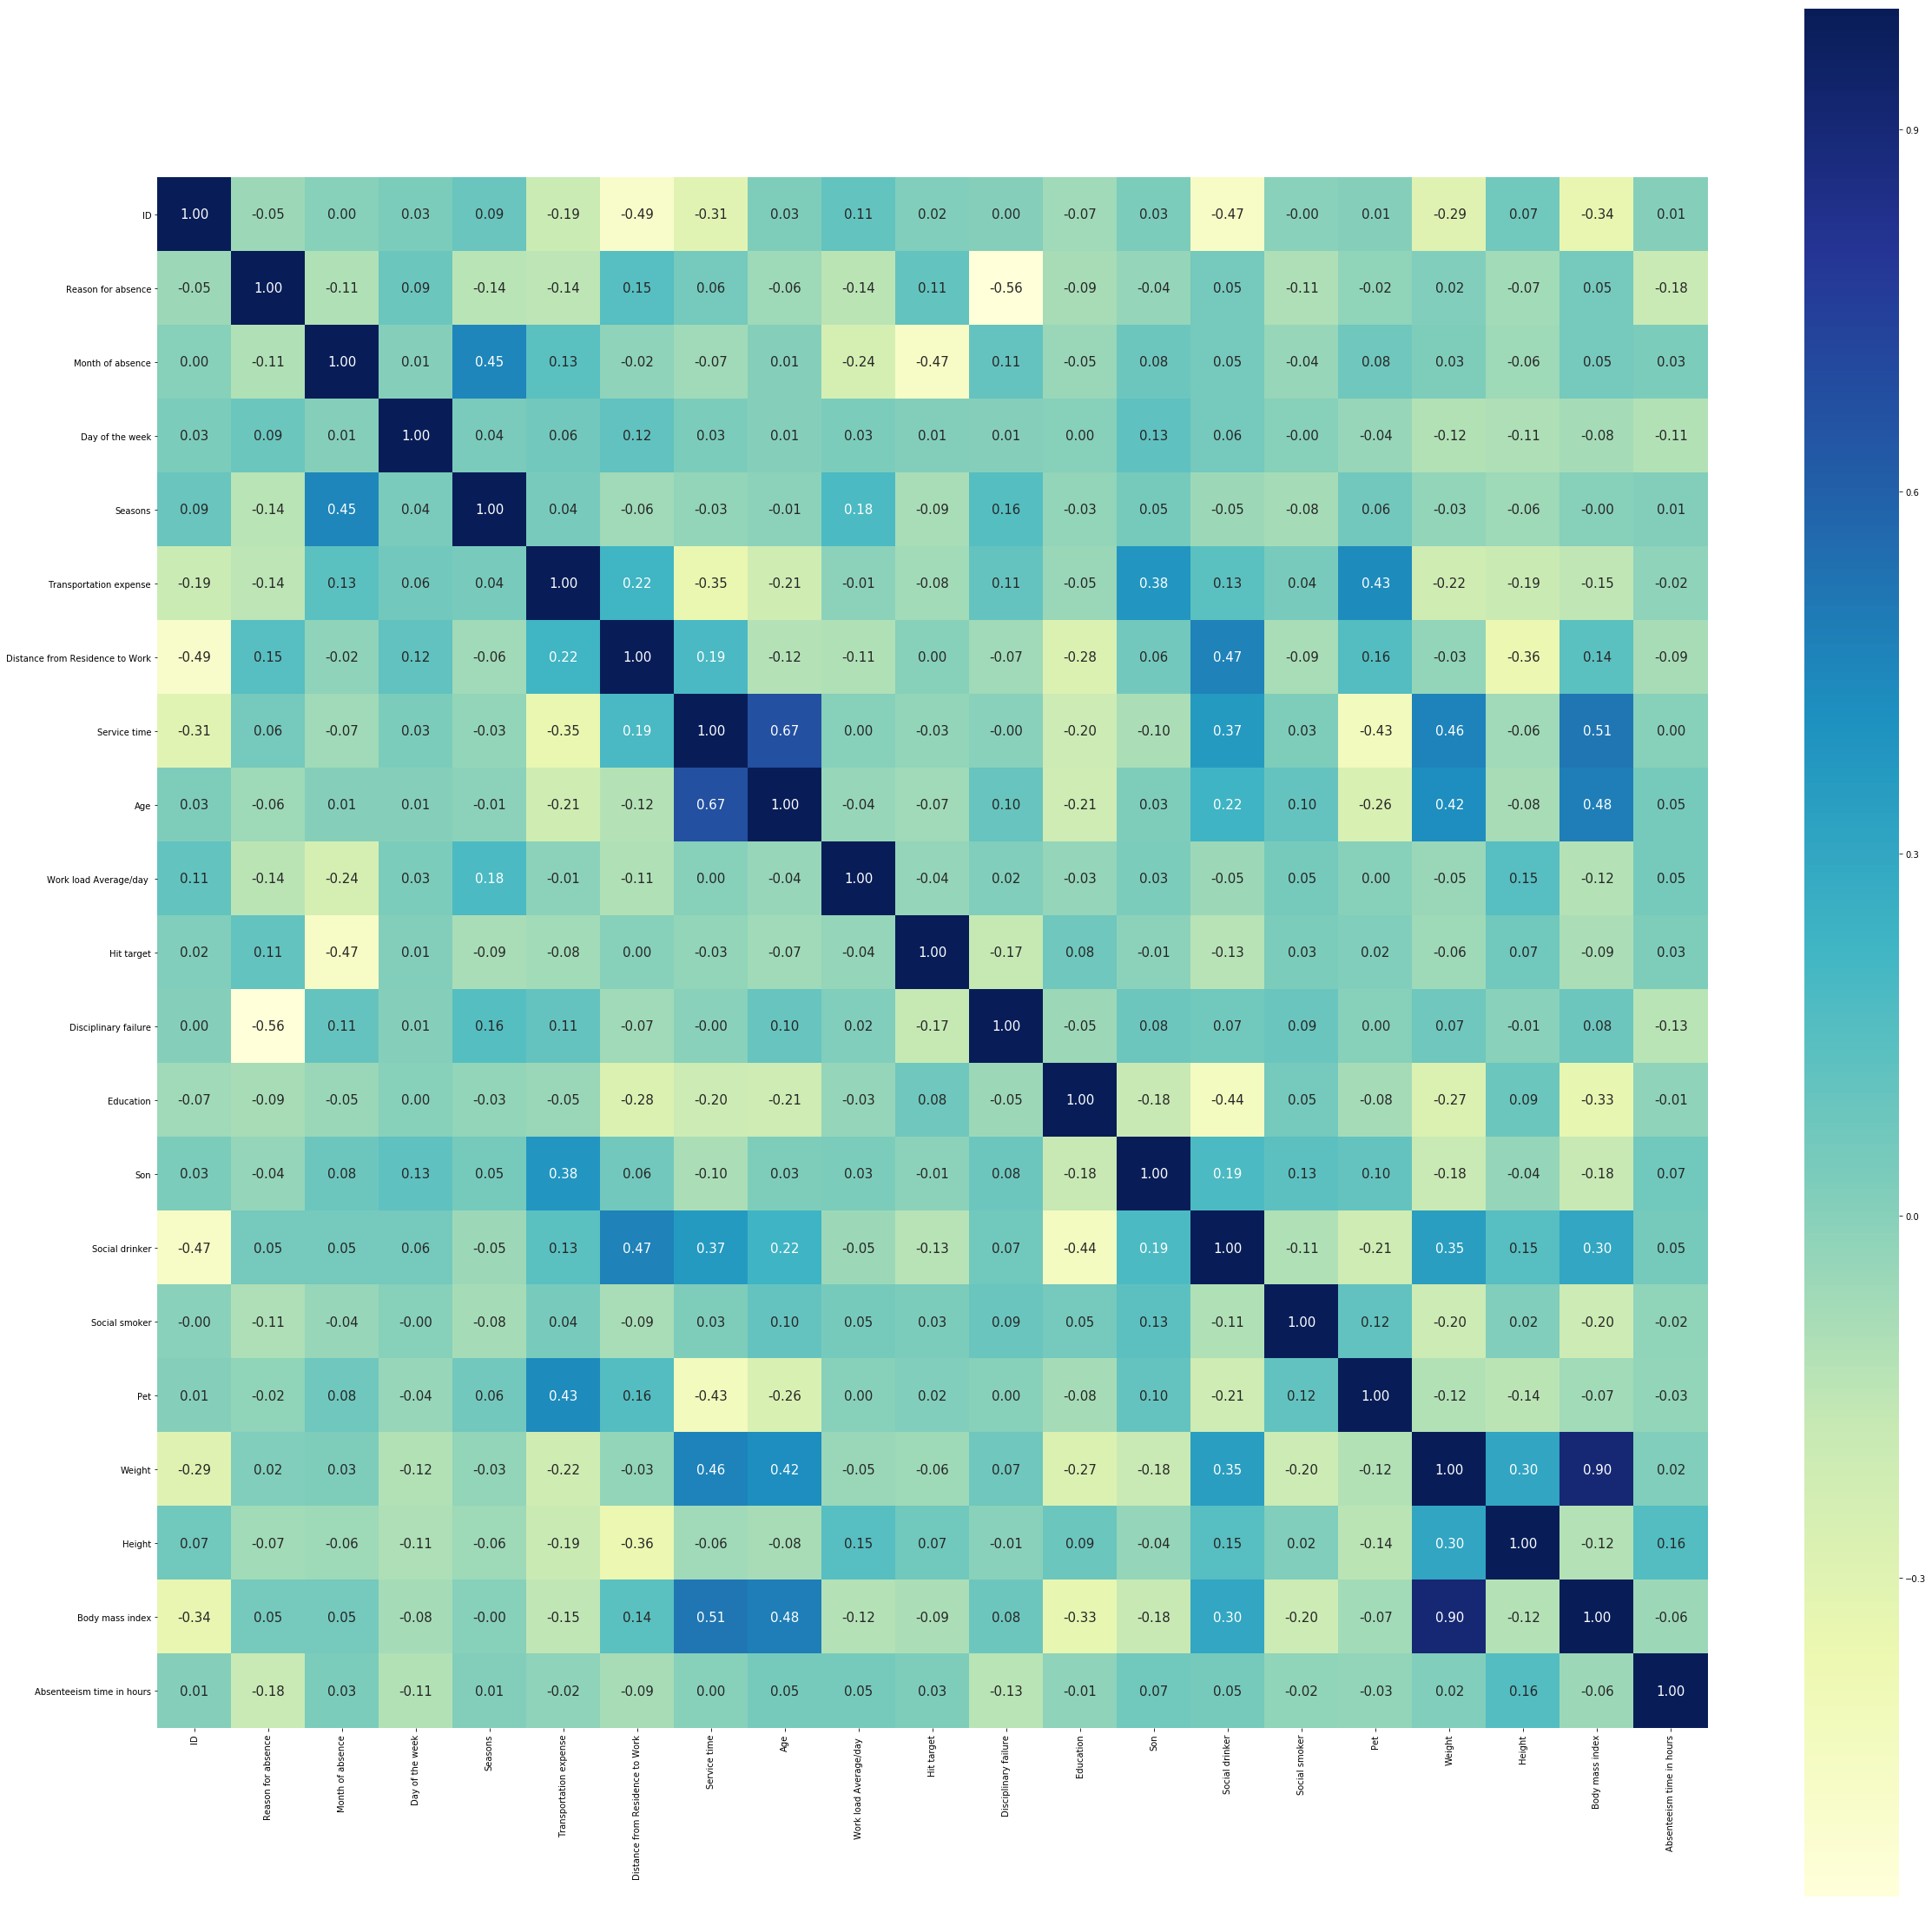

In [26]:
# 相关性
# 皮尔逊相关系数
corr_matrix = raw_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40,40))
hm=sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15}, cmap="YlGnBu")
plt.show()

In [27]:
corr_matrix['Reason for absence'].sort_values(ascending=False)

Reason for absence                 1.000000
Distance from Residence to Work    0.149766
Hit target                         0.108686
Day of the week                    0.086695
Service time                       0.057890
Social drinker                     0.054211
Body mass index                    0.053697
Weight                             0.018687
Pet                               -0.022784
Son                               -0.035365
ID                                -0.053639
Age                               -0.059169
Height                            -0.072277
Education                         -0.086628
Social smoker                     -0.105253
Month of absence                  -0.109746
Seasons                           -0.135372
Work load Average/day             -0.140001
Transportation expense            -0.142847
Absenteeism time in hours         -0.182804
Disciplinary failure              -0.564175
Name: Reason for absence, dtype: float64

In [28]:
raw_data = raw_data.drop(columns=["Day of the week", "Service time", "Social drinker", "Body mass index", "Weight","Pet", "Son", "ID", "Age", "Height", "Education", "Service time", "Education"])
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 99
Data columns (total 10 columns):
Reason for absence                 640 non-null int64
Month of absence                   640 non-null int64
Seasons                            640 non-null int64
Transportation expense             640 non-null int64
Distance from Residence to Work    640 non-null int64
Work load Average/day              640 non-null float64
Hit target                         640 non-null int64
Disciplinary failure               640 non-null int64
Social smoker                      640 non-null int64
Absenteeism time in hours          640 non-null int64
dtypes: float64(1), int64(9)
memory usage: 55.0 KB


<Figure size 432x288 with 0 Axes>

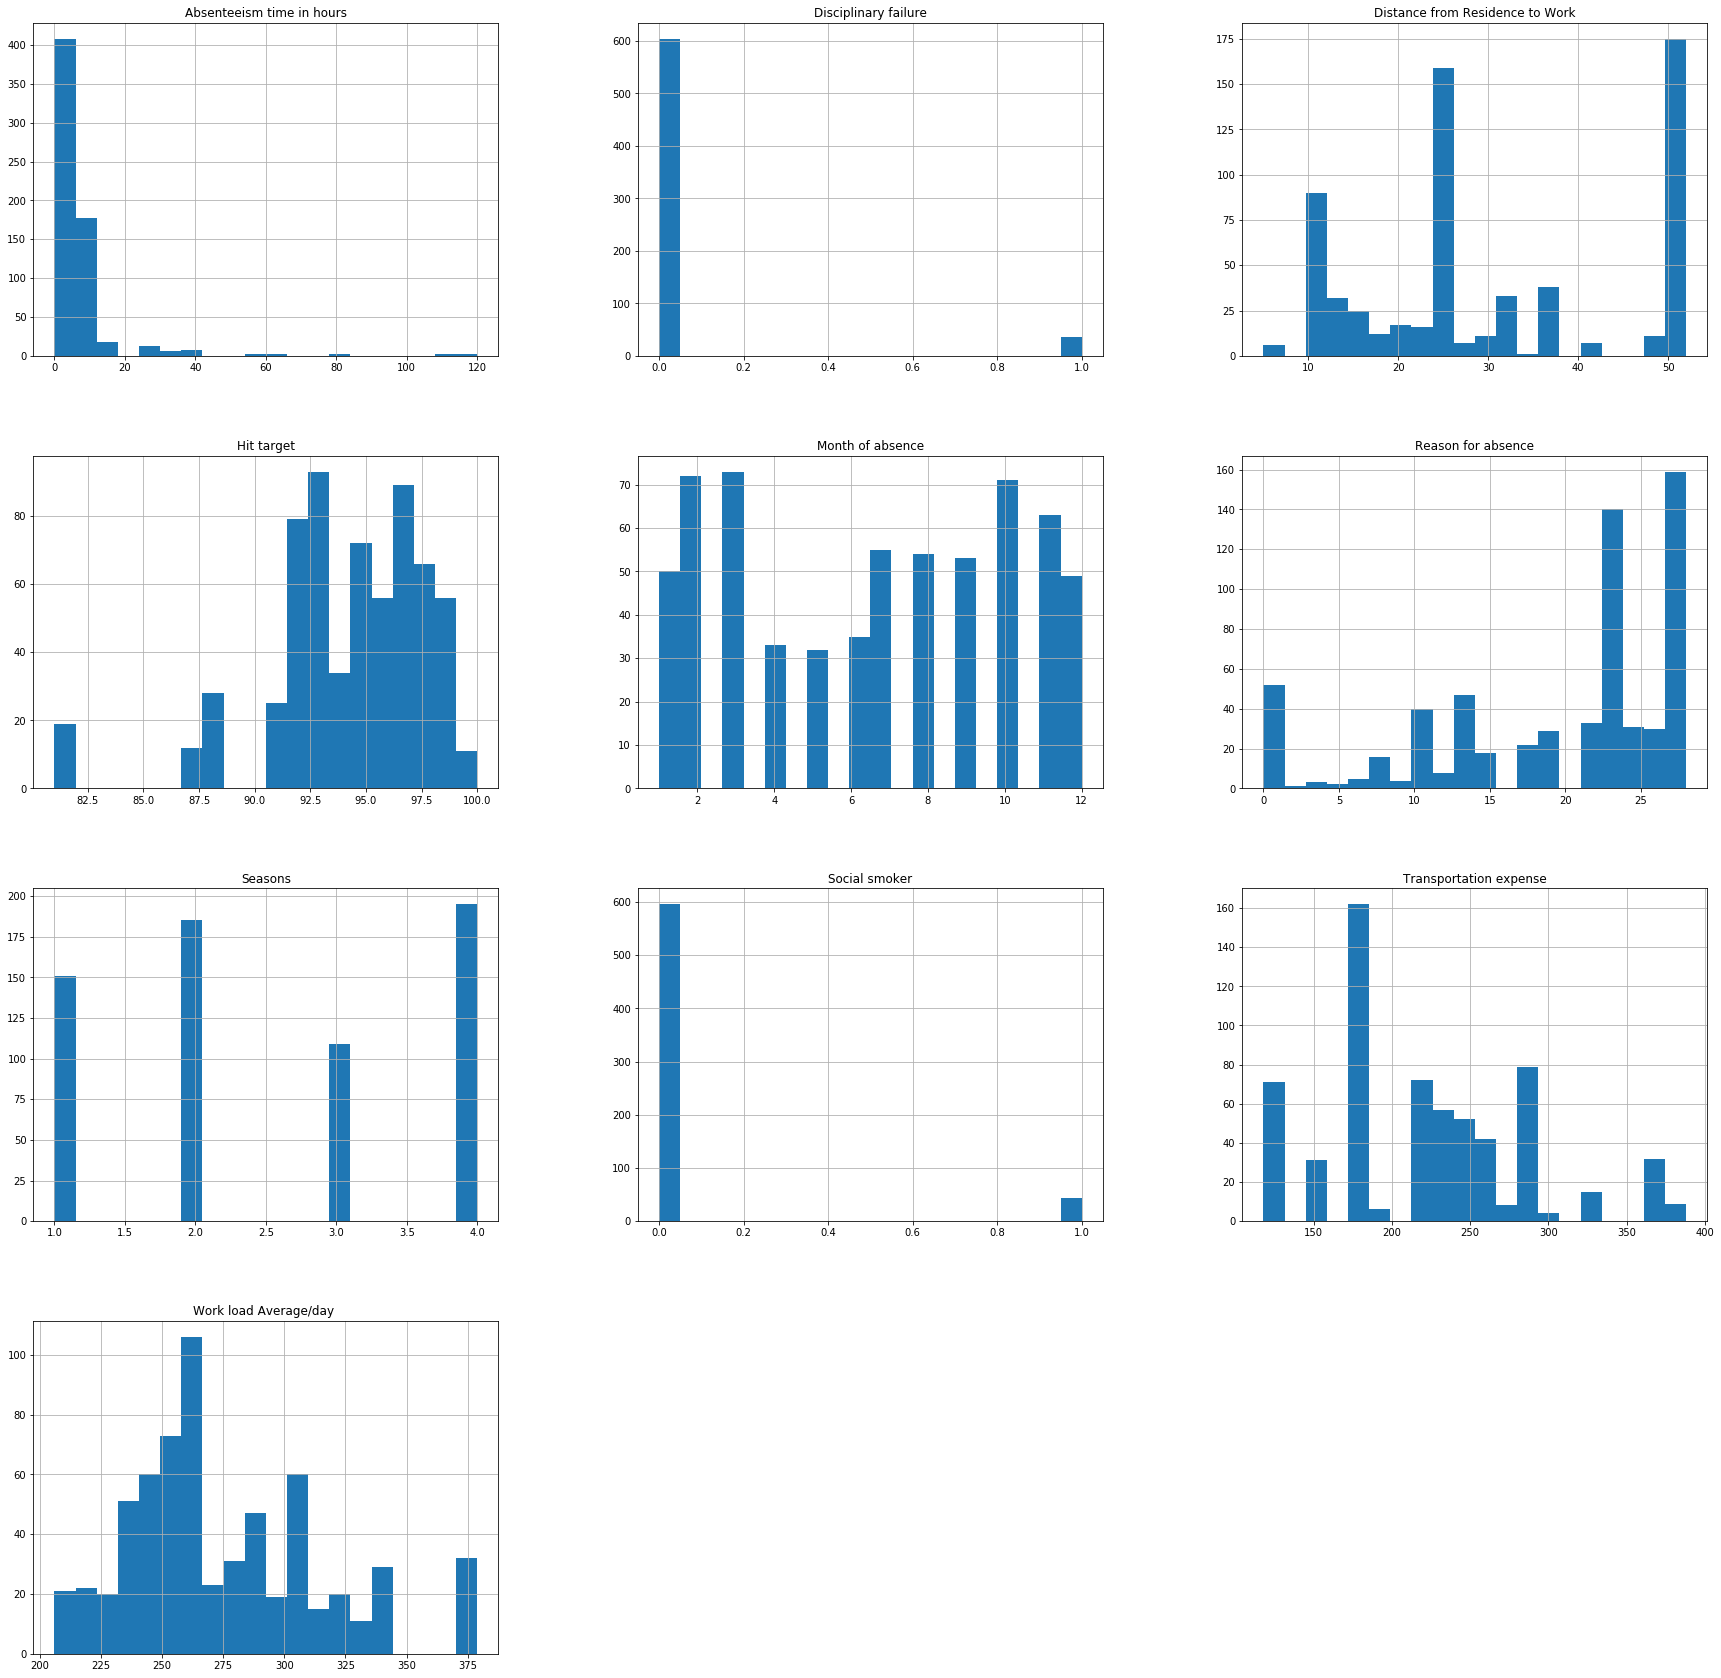

In [29]:
plt.figure(1)
raw_data.hist(bins=20, figsize=(30, 30))
plt.show()

In [30]:
# one-hot encoder
# attr education has been delete, so no need to encoder
# 离散
from sklearn import preprocessing
featureCatCols = ["Seasons", "Month of absence"]
X_vec_cat = raw_data[featureCatCols].values
enc=preprocessing.OneHotEncoder(categories='auto')
enc.fit(X_vec_cat)
X_vec_cat_ed=enc.transform(X_vec_cat).toarray()
X_vec_cat_ed

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
# for continuous
# deal with skew
featureConCols = ["Absenteeism time in hours", "Distance from Residence to Work", "Hit target", "Transportation expense", "Work load Average/day "]
dataFeatureCon = raw_data[featureConCols]
for attr in featureConCols:
    if(dataFeatureCon[attr].skew(axis=0) > 1.0):
        dataFeatureCon[attr] = np.log(dataFeatureCon[attr] + 1)

# Standard
X_vec_con = dataFeatureCon.values
scaler=preprocessing.StandardScaler().fit(X_vec_con)
X_vec_con_ed=scaler.transform(X_vec_con)

/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [32]:
# others
featureOthers = ["Disciplinary failure", "Social smoker"]
X_vec_other = raw_data[featureOthers].values

In [33]:
X_vec=np.concatenate((X_vec_con_ed,X_vec_cat_ed, X_vec_other),axis=1)

In [34]:
# 构建 target 向量
# 目标
dataFeatureConTarget = raw_data["Reason for absence"]
Y_vec = dataFeatureConTarget.values
Y_vec = Y_vec[:, np.newaxis]

In [44]:
# split train and test data
# select again
from sklearn.feature_selection import GenericUnivariateSelect, f_classif
attrs = 10
transformer = GenericUnivariateSelect(f_classif, 'k_best', param=attrs)
X_vec_ed = transformer.fit_transform(X_vec, Y_vec)

x_train = X_vec_ed[0 : n_train]
y_train = Y_vec[0 : n_train]
x_test = X_vec_ed[n_train : n_test+n_train]
y_test = Y_vec[n_train : n_test+n_train]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(540, 10) (540, 1) (100, 10) (100, 1)


/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [46]:
# SVC
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

clf = SVC(kernel="linear")
clf.fit(x_train, y_train)
y_pre = clf.predict(x_test)
recall = recall_score(y_test, y_pre, average='micro')
acc = precision_score(y_test, y_pre, average='micro') 
f1 = f1_score(y_test, y_pre, average='micro')
print("Accuracy = ", acc)
print('Recall = ', recall)
print('F1 = ', f1)

Accuracy =  0.41
Recall =  0.41
F1 =  0.41


/home/ddrh/Software/python_venv/general/lib/python3.5/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
